# Serie Image processing: post 2, The histograms

In [3]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np

In [2]:
#!py -m pip install scikit-image

## Afficher l'image original

In [2]:
image1 = imread('railway.jpg') #, as_gray=True)

In [4]:
image1[0,1]

array([107, 140, 131], dtype=uint8)

In [ ]:
# formule image gris
# (0.2125*107+0.7154*140+0.0721*131)/(255)


0.5189749019607843

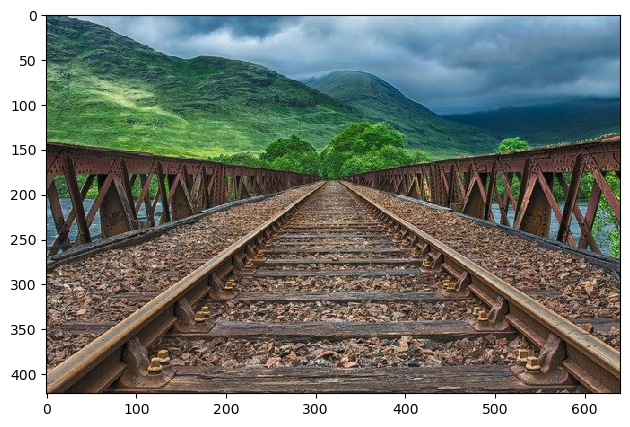

In [5]:
imshow(image1)

In [7]:
image1_Gray = rgb2gray(image1)
image2_Gray = imread('railway.jpg', as_gray=True)

In [8]:
image1_Gray

array([[0.47135059, 0.5189749 , 0.46799451, ..., 0.71744157, 0.72136314,
        0.72136314],
       [0.46463843, 0.43466471, 0.39937059, ..., 0.70175529, 0.70567686,
        0.70567686],
       [0.37194941, 0.35234157, 0.29772235, ..., 0.69391216, 0.69783373,
        0.69783373],
       ...,
       [0.49070706, 0.54560902, 0.57951922, ..., 0.22250078, 0.23090941,
        0.20738   ],
       [0.58344078, 0.53638196, 0.49492627, ..., 0.22642235, 0.23875255,
        0.21130157],
       [0.5442251 , 0.51175137, 0.43360275, ..., 0.21465765, 0.24659569,
        0.23090941]])

In [ ]:
image1_Gray*255

array([[120.3386, 132.3386, 118.8395, ..., 182.9476, 183.9476, 183.9476],
       [117.8395, 110.8395, 101.9837, ..., 178.9476, 179.9476, 179.9476],
       [ 94.8471,  89.9192,  75.9192, ..., 177.0918, 178.0918, 178.0918],
       ...,
       [125.1303, 139.7774, 147.7774, ...,  56.6656,  58.8819,  52.8819],
       [148.7774, 136.7774, 126.2062, ...,  57.6656,  60.8819,  53.8819],
       [138.7774, 130.7774, 110.5687, ...,  54.6656,  62.8819,  58.8819]])

C:\Users\gcher\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


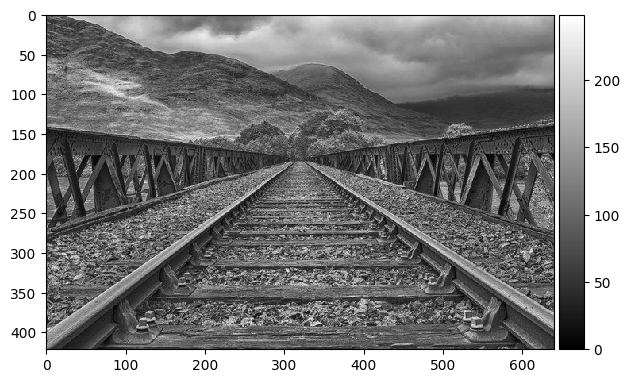

In [ ]:
imshow(image1_Gray*255,cmap=plt.get_cmap('gray'))

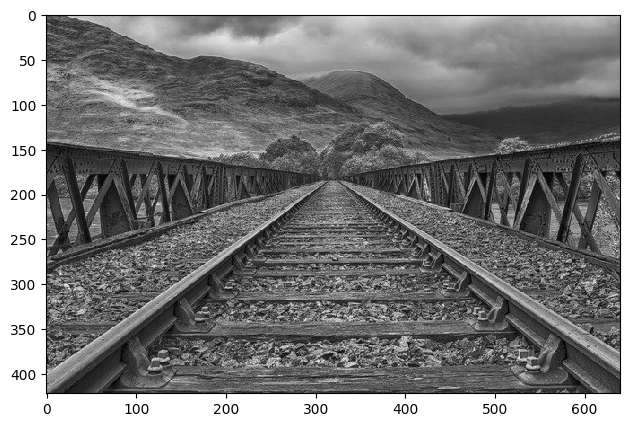

In [ ]:
imshow(image2_Gray)

### Convert image in Black and white only

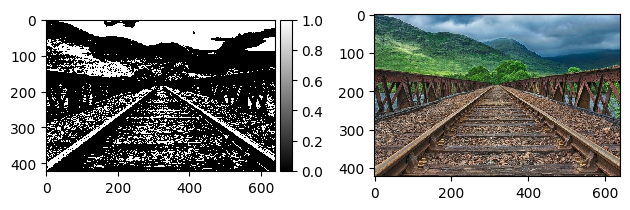

In [ ]:
im = np.where(image1_Gray<125/255, 0, 1)
plt.subplot(1,2,1)
imshow(im, cmap=plt.get_cmap('gray'))
plt.subplot(1,2,2)
imshow(image1)

In [ ]:
im

array([[0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [ ]:
image1_Gray.shape


(422, 640)

### Grayscale image

In [ ]:
image1_Gray

array([[0.47191608, 0.5189749 , 0.46603725, ..., 0.71744157, 0.72136314,
        0.72136314],
       [0.46211569, 0.43466471, 0.39993608, ..., 0.70175529, 0.70567686,
        0.70567686],
       [0.37194941, 0.35262431, 0.29772235, ..., 0.69447765, 0.69839922,
        0.69839922],
       ...,
       [0.49070706, 0.54814667, 0.57951922, ..., 0.22221804, 0.23090941,
        0.20738   ],
       [0.58344078, 0.53638196, 0.49492627, ..., 0.22613961, 0.23875255,
        0.21130157],
       [0.5442251 , 0.51285255, 0.43360275, ..., 0.2143749 , 0.24659569,
        0.23090941]])

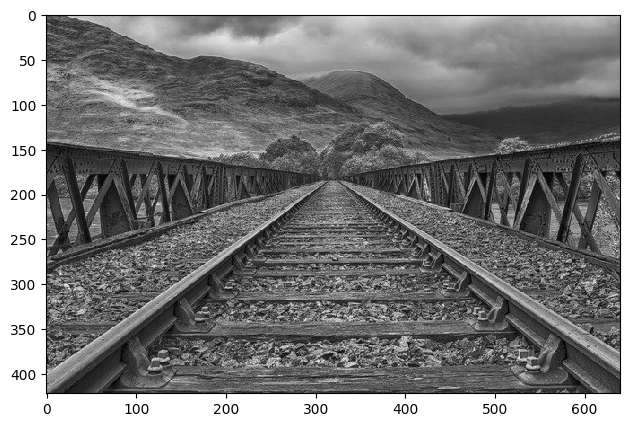

In [ ]:
imshow(image1_Gray)

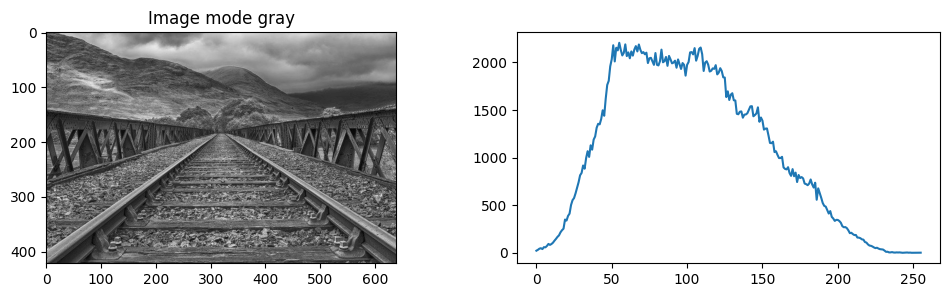

In [ ]:
def histGrayScale(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img,cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image mode gray')
    hist = exposure.histogram(img)
    #ax[1].plot(hist[1])
    ax[1].plot(hist[0])
histGrayScale(image2_Gray)

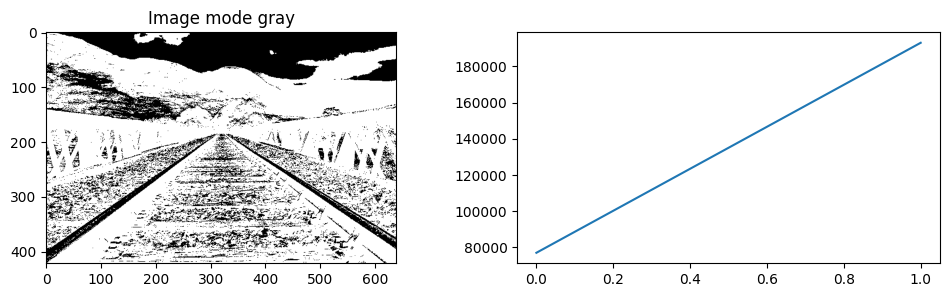

In [ ]:
histGrayScale(im)

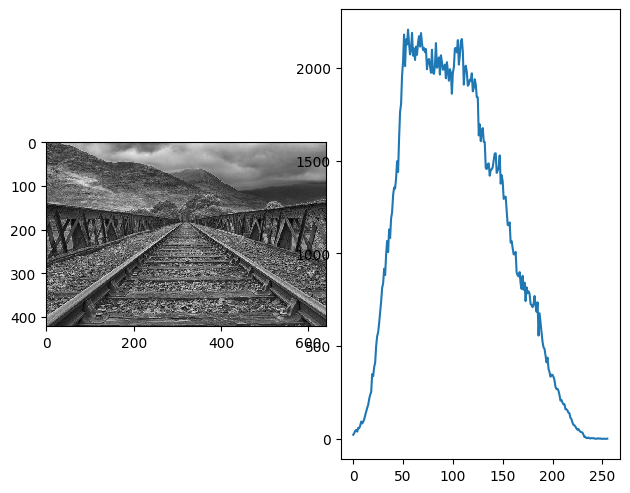

In [ ]:
figsize=(12, 3)
plt.subplot(1,2,1)
imshow(image1_Gray,cmap=plt.get_cmap('gray'))
plt.subplot(1,2,2)

hist = exposure.histogram(image1_Gray)
plt.plot(hist[0])


For a better rendering you need to use the good colormap (https://predictablynoisy.com/matplotlib/api/_as_gen/matplotlib.pyplot.get_cmap.html)

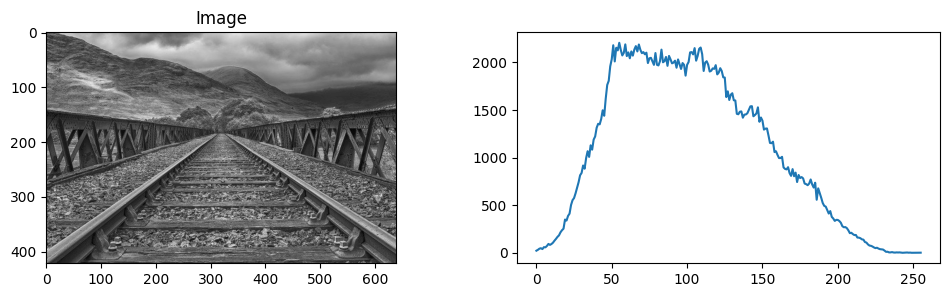

In [ ]:
def histGrayScale(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
histGrayScale(image1_Gray)

In [ ]:
image1_Gray.ndim

2

### Display histogram for image 1 (colored)

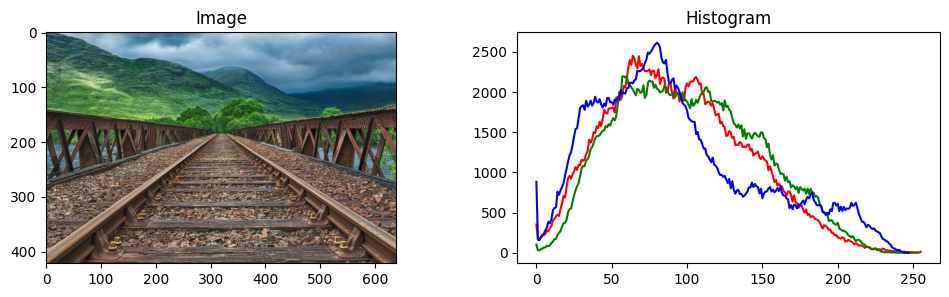

In [ ]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
histColor(image1)

# Function to display image and histogram together

In [ ]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image)
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

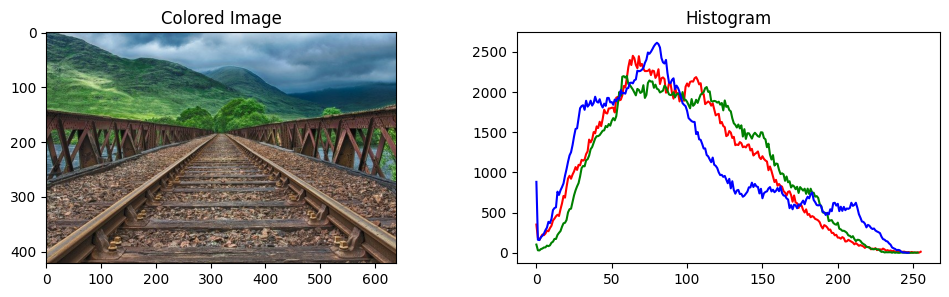

In [ ]:
imageHist(image1)

## Histograms

In [ ]:
G = imread('images/G.jpg')
B = imread('images/B.jpg')
R = imread('images/R.jpg')

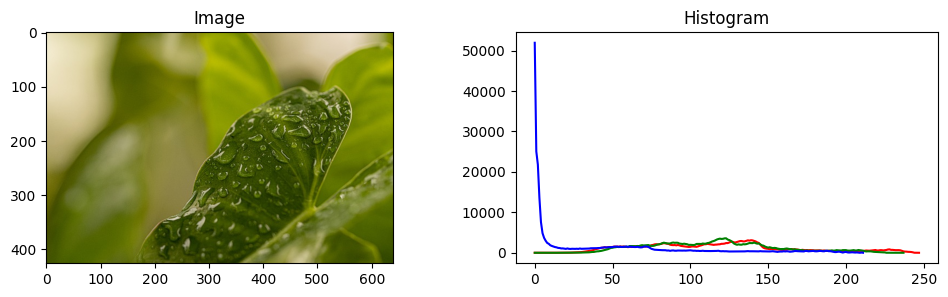

In [ ]:
histColor(G)

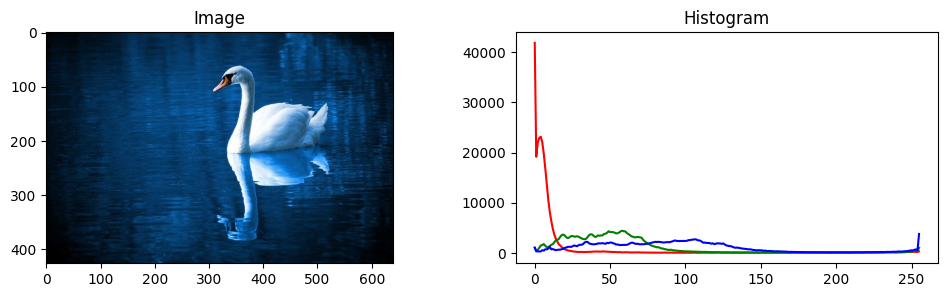

In [ ]:
histColor(B)

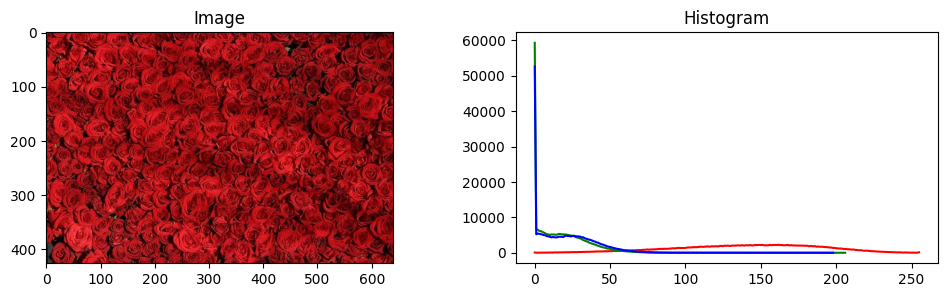

In [ ]:
histColor(R)

# Histogram with OpenCV

In [ ]:
import cv2 as cv
img = cv.imread('images/railway.jpg')
img.shape

(422, 640, 3)

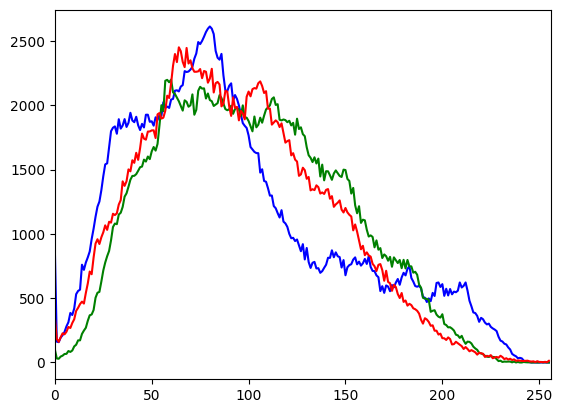

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
def histogramOpenCV(_img):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(_img)
    axis[1].set_title('Histogram')
    axis[0].set_title('Image')
    rgbcolors = ['red', 'green', 'blue']
    for i,col in enumerate(color):
        histr = cv.calcHist([_img],[i],None,[256],[0,256])
        axis[1].plot(histr,color = col)

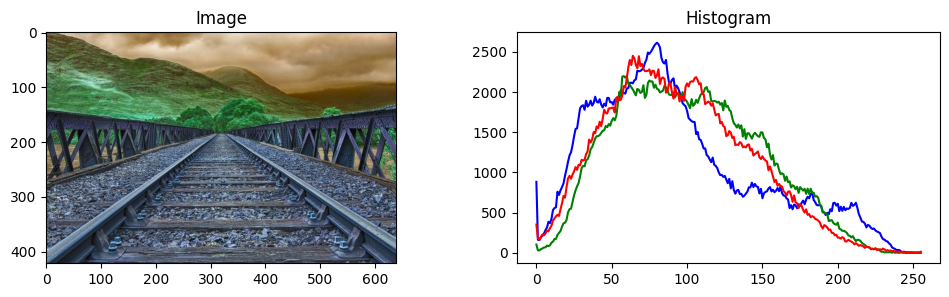

In [ ]:
histogramOpenCV(img)

In [ ]:
import numpy as np
from PIL import Image

image = Image.open("images/railway.jpg")
np_array = np.array(image)
np_array.shape
#pil_image=Image.fromarray(np_array)
#pil_image.show()

(422, 640, 3)

In [ ]:
pil_image=Image.fromarray(np_array)
pil_image.show()

In [ ]:
import pandas as pd
data=pd.read_csv('sign_mnist_train.csv')

In [ ]:
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         153  ...       207       207       207       207       206   
1         158  ...        69       149       128        87        94   
2         187  ...       202       201       200       199       198   
3         210  ...       235       234       233       231       230   
4         185  ...        92       105       105       108       133   
...       ...  ...       ...       ...       ...       ...       ...   
27450     193  ...       132       165        99        77        52   
27451     166  ...       198       198       198       198       198   
27452     173  ...       121       196       209       208       206   
27453     191  ...       119        56        27        58       102   
27454     182  ...       108       132       170       194       214   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           206       206       204       203       202  
1           163       175       103       135       149  
2           199       198       195       194       195  
3           226       225       222       229       163  
4           163       157       163       164       179  
...         ...       ...       ...       ...       ...  
27450       200       234       200       222       225  
27451       196       195       195       195       194  
27452       204       203       202       200       200  
27453        79        47        64        87        93  
27454       203       197       205       209       215  

[27455 rows x 785 columns]

In [ ]:
y=data.values[100]
y=y[1:]
y

array([156, 157, 159, 160, 161, 163, 164, 163, 163, 163, 163, 161, 161,
       163, 159, 158, 158, 157, 156, 156, 156, 154, 153, 153, 153, 150,
       149, 151, 155, 158, 160, 161, 163, 164, 164, 164, 164, 164, 165,
       164, 162, 162, 163, 162, 161, 159, 158, 157, 158, 155, 155, 155,
       154, 152, 150, 151, 157, 158, 161, 163, 164, 165, 165, 166, 167,
       167, 167, 166, 163, 158, 143, 156, 167, 160, 161, 170, 162, 157,
       157, 157, 154, 154, 153, 152, 159, 160, 163, 166, 166, 166, 167,
       167, 167, 166, 167, 165, 166, 138,  89,  48, 128, 135,  88,  91,
       154, 164, 158, 155, 156, 155, 154, 155, 160, 162, 164, 166, 167,
       168, 168, 168, 169, 168, 170, 170, 152, 107,  79,  22, 109, 105,
        70,   0,  49, 160, 155, 166, 158, 157, 155, 155, 161, 165, 166,
       167, 168, 167, 169, 170, 168, 161, 123, 146, 136, 113,  47,  51,
       144,  97,  72,  23,  88, 102,  61,  98, 166, 158, 158, 157, 164,
       164, 166, 169, 168, 168, 170, 169, 172, 161, 104, 110, 16

In [ ]:
y=y.reshape(28,28)
y=np.array(y, dtype=np.uint8)
y.shape

(28, 28)

In [ ]:
pil_image=Image.fromarray(y)
pil_image.show()

In [ ]:

pil_image=pil_image.resize((600,600))

In [ ]:
pil_image.show()

In [ ]:

pil_image.save( 'nomImage' + "-nouveau" + '.png');

# Filtre

In [ ]:
import numpy
            
def convolution2D(X,H,moitie):
    s = X.shape
    py = int((H.shape[0]-1)/2)
    px = int((H.shape[1]-1)/2)
    Y = X.copy()
    if moitie:
        imax = int(s[1]/2)
    else:
        imax = s[1]-px
    for i in range(px,imax):
        for j in range(py,s[0]-py):
            somme = 0.0
            for k in range(-px,px+1):
                for l in range(-py,py+1):
                    somme += X[j+l][i+k]*H[l+py][k+px]
            Y[j][i] = somme
    return Y

In [ ]:
s = y.shape
imax = int(s[1]/2)
imax
h = numpy.ones((3,3))*1.0/9
px = int((h.shape[1]-1)/2)
px

1

In [ ]:
import imageio
import numpy

In [ ]:
from  matplotlib.pyplot import *

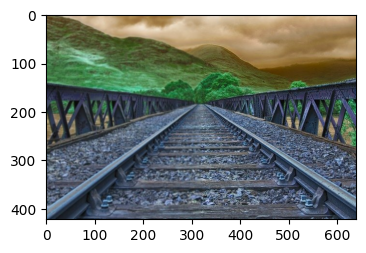

In [ ]:
h = numpy.ones((3,3))*1.0/9
Y = convolution2D(img,h,True)
figure(figsize=(4,4))
imshow(Y,cmap=cm.gray)

# Filtre gaussien

In [ ]:
import math
def filtreGaussien(P):
    epsilon = 0.05
    sigma = P*1.0/math.sqrt(-2*math.log(epsilon))
    h = numpy.zeros((2*P+1,2*P+1))
    som = 0
    for m in range(-P,P+1):
        for n in range(-P,P+1):
            h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma))
            som += h[m+P][n+P]
    h = h/som
    return h

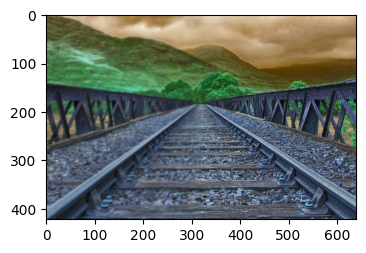

In [ ]:
h = filtreGaussien(3)             
Y = convolution2D(img,h,True)
figure(figsize=(4,4))
imshow(Y,cmap=cm.gray)

In [ ]:
def seuillage(image,seuil):
    resultat = image.copy()
    s = image.shape
    for j in range(s[0]):
        for i in range(s[1]):
            if image[j,i] > seuil:
                resultat[j,i] = 1
            else:
                resultat[j,i] = 0
    return resultat
    
im4 = seuillage(img,100)
figure(figsize=(4,4))
imshow(im4,cmap='gray',vmin=0,vmax=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

TypeError: color must be int or single-element tuple

In [ ]:
x

187

In [ ]:

img = imread('lenna.jpg')
img

array([[[146, 146, 146, 255],
        [146, 146, 146, 255],
        [142, 142, 142, 255],
        ...,
        [155, 155, 155, 255],
        [  0,   0,   0, 255],
        [121, 121, 121, 255]],

       [[146, 146, 146, 255],
        [  0,   0,   0, 255],
        [255, 255, 255, 255],
        ...,
        [155, 155, 155, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[148, 148, 148, 255],
        [142, 142, 142, 255],
        [142, 142, 142, 255],
        ...,
        [  0,   0,   0, 255],
        [133, 133, 133, 255],
        [ 92,  92,  92, 255]],

       ...,

       [[255, 255, 255, 255],
        [ 29,  29,  29, 255],
        [ 30,  30,  30, 255],
        ...,
        [ 56,  56,  56, 255],
        [ 66,  66,  66, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [ 26,  26,  26, 255],
        [ 27,  27,  27, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [ 69,  69,  69, 255]],

       [[ 23

(256, 256)